In [1]:
import numpy as np
import pandas
import csv
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#fpath = Path(mpl.get_data_path(), "/ccs/home/davidsonrb/.fonts/Helvetica.ttc")

task_timings_file = 'timings.csv'   # timing file output from the dask tskmgr script
start_time = 'Sep 10 04:21:15 2022' # start time printed in the stdout of the submit script
end_time = 'Sep 10 04:49:48 2022'   # end time printed in the stdout of the submit script


In [2]:
st = datetime.strptime(start_time, "%b %d %H:%M:%S %Y") # change formatting as needed
et = datetime.strptime(end_time, "%b %d %H:%M:%S %Y")
print(st.timestamp())
print(et.timestamp())
total_time = (et - st).total_seconds()
print(total_time)

1662798075.0
1662799788.0
1713.0


In [3]:
task_timings = pandas.read_csv(task_timings_file)

In [4]:
task_timings

,hostname,worker_id,start_time,stop_time,run_number,n_steps
0,d08n08,Worker-a9030a93-95c6-4f77-b20e-97e9e4968e09,1.662799e+09,1.662799e+09,b4e7dac0-65ec-4b78-ad44-84bb64874e6b,250000
1,b18n15,Worker-07759b89-f771-46db-8c55-f1bec223b825,1.662799e+09,1.662799e+09,b4d8cb8b-1835-4254-908d-c43c21147e48,250000
2,b18n15,Worker-040c429e-1d1b-4a3e-af9a-274e6e33e763,1.662799e+09,1.662799e+09,00685b17-cfeb-4668-80c1-56e13e510714,250000
3,d07n15,Worker-d822da19-ed45-44f2-8903-a21bc08a3656,1.662799e+09,1.662799e+09,812d854c-6eab-4201-958f-820a75312ffe,250000
4,a34n04,Worker-9bdcf079-2bbc-4e70-8845-086a9851d98f,1.662799e+09,1.662799e+09,8fbffb2b-b0c7-4406-b05d-7b7b208d25ab,250000
...,...,...,...,...,...,...
35995,b12n12,Worker-107437e0-8912-438f-9f98-f3a1af1897cc,1.662799e+09,1.662800e+09,60dd346f-725e-4149-8b17-9ec6e959e287,250000
35996,a26n13,Worker-b859aa9f-e854-4f76-83e7-a1c604fadb15,1.662799e+09,1.662800e+09,c511e557-47ab-4132-8c60-5bf761116478,250000
35997,b16n14,Worker-1c914ec3-5e5d-466c-8842-1bc94d5d1cf1,1.662799e+09,1.662800e+09,8b1fbf69-326b-4b78-8bbc-b9c1964c2dce,250000
35998,a09n14,Worker-2138c506-8988-4075-a63b-fa07ee8160a6,1.662799e+09,1.662800e+09,db25256a-05f4-4a4a-b0bd-b6d3033350cb,250000


In [5]:
task_timings.dtypes

hostname       object
worker_id      object
start_time    float64
stop_time     float64
run_number     object
n_steps         int64
dtype: object

244.4752447605133 321.8606746196747 273.7381646633148


/tmp/ipykernel_1221913/1814385704.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


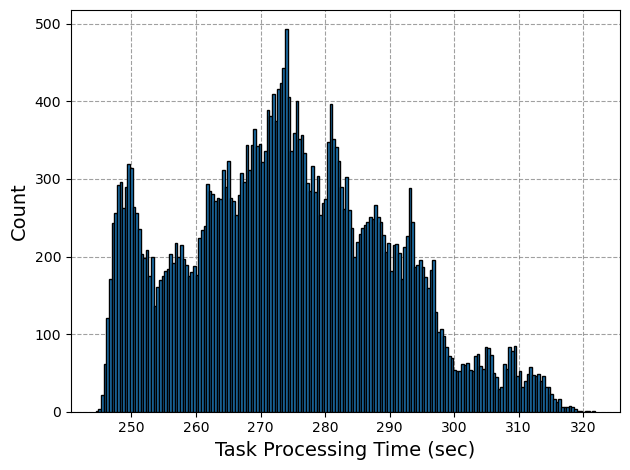

In [6]:
### Grabbing each task's stop and start times and taking the difference to calculate the total time spent on each individual task
# histogram those results
individual_task_times = np.array(task_timings['stop_time'] - task_timings['start_time'])
print(np.min(individual_task_times),np.max(individual_task_times),np.median(individual_task_times))

plt.hist(individual_task_times,bins='sqrt',ec='k',zorder=3)
#plt.plot([np.max(individual_task_times),np.max(individual_task_times)],[0,25],'r-',zorder=3)
#plt.plot([np.median(individual_task_times),np.median(individual_task_times)],[0,1000],'r-',zorder=2)
#plt.text(np.max(individual_task_times),40,"Max",ha='right',zorder=2)
plt.xlabel('Task Processing Time (sec)',size=14)
plt.ylabel('Count',size=14)
#plt.xlim((-0.1,500))
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('individual_task_timing_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

In [7]:
np.min(task_timings['start_time']) - st.timestamp()

781.5680775642395

Averages: [822.92775295 797.01274125  85.53625354   7.52325226]
Median: [829.73662269 794.17092204  75.4375838    7.64360189]
StDev: [31.66692403 14.58775572 33.54880434  3.46600741]
(12000, 4)
10800


/tmp/ipykernel_1221913/3808873757.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


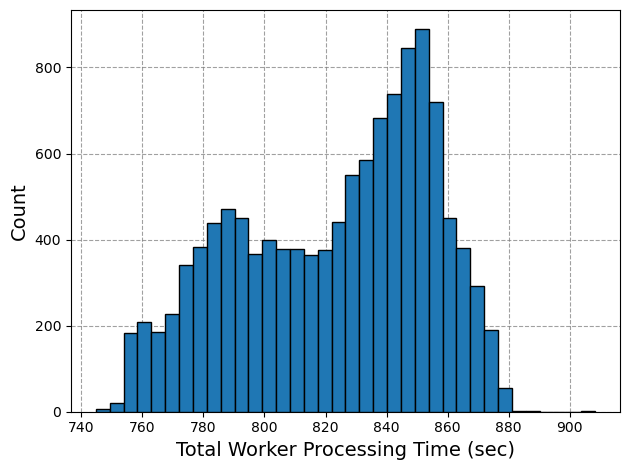

/tmp/ipykernel_1221913/3808873757.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


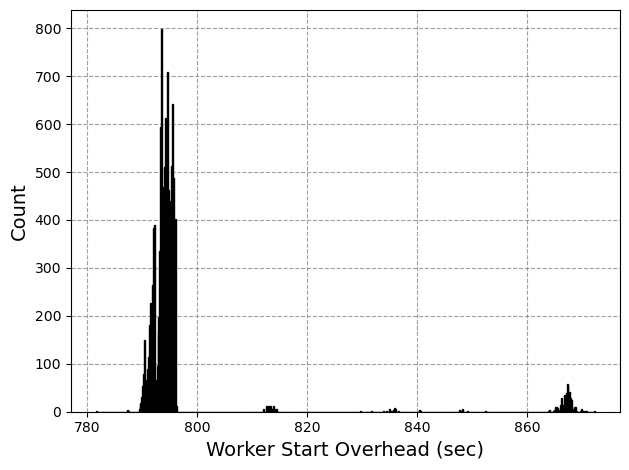

/tmp/ipykernel_1221913/3808873757.py:57: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


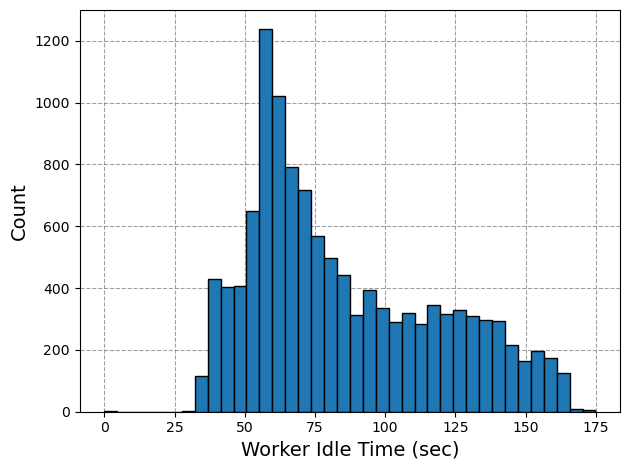

/tmp/ipykernel_1221913/3808873757.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


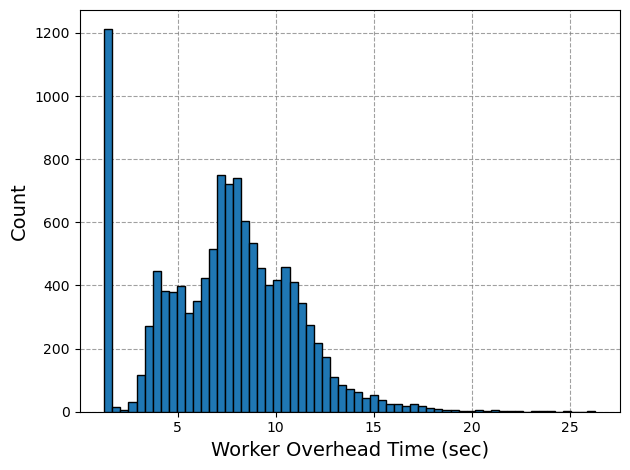

In [8]:
# grabbing the last task's stop time
last_task_end = np.max(task_timings['stop_time'])
# calculate the end overhead for shutting down client and dask cluster
end_overhead = et.timestamp() - last_task_end
# get the unique set of workers
workers = list(set(task_timings['worker_id']))

worker_data = []
for worker in workers:
    # get indices of rows in the dataframe assocaited with the specific worker
    indices = task_timings['worker_id'] == worker
    # calculate total worker processing time
    worker_task_time = np.sum(task_timings[indices]['stop_time'] - task_timings[indices]['start_time'])
    # grab worker's initial start and final stop times
    worker_start_time = np.min(task_timings[indices]['start_time'])
    worker_stop_time  = np.max(task_timings[indices]['stop_time'])
    # calculate start overhead
    start_overhead  = worker_start_time - st.timestamp()
    # calculate idle time after all worker's tasks have finished but other workers' tasks are still running
    idle_time = last_task_end - worker_stop_time
    # overhead time between tasks being worked on
    worker_overhead = total_time - worker_task_time - idle_time - start_overhead
    
    worker_data.append([worker_task_time,start_overhead,idle_time,worker_overhead])
worker_data = np.array(worker_data)
print('Averages:',np.mean(worker_data,axis=0))
print('Median:',np.median(worker_data,axis=0))
print('StDev:',np.std(worker_data,axis=0))

print(worker_data.shape)
nWorkers = worker_data.shape[0]
nBins = int(0.9*nWorkers)
print(nBins)

plt.hist(worker_data[:,0],bins='auto',ec='k',zorder=3)
plt.xlabel('Total Worker Processing Time (sec)',size=14)
plt.ylabel('Count',size=14)
#plt.xlim((-0.1,500))
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('total_worker_timing_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,1],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Start Overhead (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_start_overhead_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,2],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Idle Time (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_idle_time_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()

plt.hist(worker_data[:,3],bins='auto',ec='k',zorder=3)
plt.xlabel('Worker Overhead Time (sec)',size=14)
plt.ylabel('Count',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.tight_layout()
plt.savefig('worker_overhead_time_hist.png',dpi=600,transparent=True)
plt.show()
plt.close()


b4e7dac0-65ec-4b78-ad44-84bb64874e6b


/tmp/ipykernel_1221913/2438979495.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)


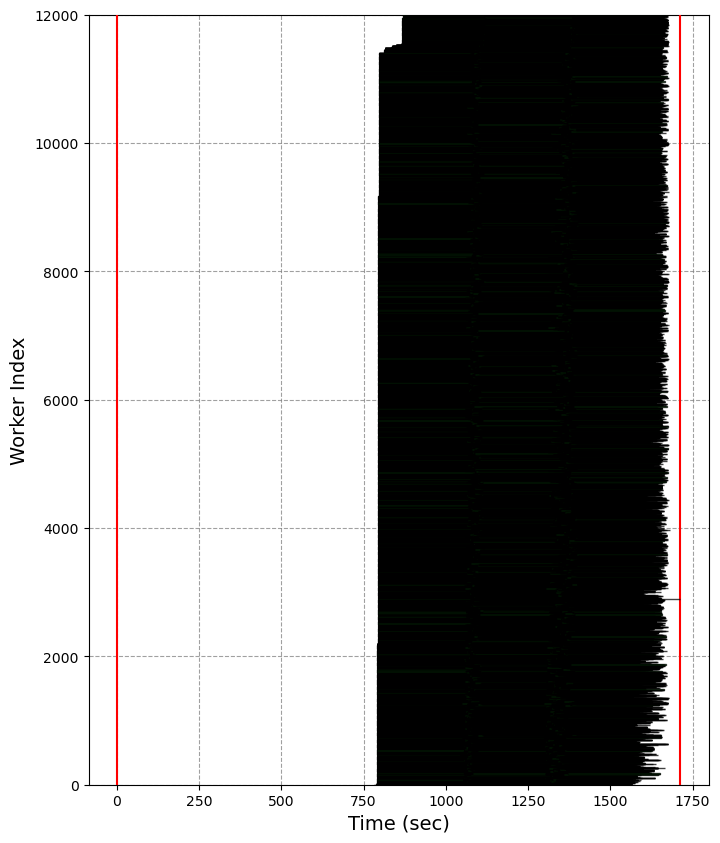

In [10]:
idx = np.argsort(task_timings['start_time'])
worker_dict = {}
for i,index in enumerate(idx):
    worker = task_timings.loc[index]['worker_id']
    if worker in worker_dict:
        continue
    else:
        worker_dict[worker] = i

figure = plt.figure(figsize=(8,10))
ax = plt.gca()
#fig, ax = plt.subplots(1)
ax.plot([0,0],[0,nWorkers+1],'r-',zorder=3)
ax.plot([total_time,total_time],[0,nWorkers+1],'r-',zorder=3)

print(task_timings.loc[0]['run_number'])
nTasks = task_timings.shape[0]
for i in range(nTasks):
    worker_int = worker_dict[task_timings.loc[i]['worker_id']]
    facecolor = 'xkcd:green'
    #if task_timings.loc[i]['run_num'] == pandas.NA:
    #    facecolor = 'xkcd:red'
    
    test = Rectangle((task_timings.loc[i]['start_time'] - st.timestamp(), worker_int + 0.6), # xy
                      task_timings.loc[i]['stop_time'] - task_timings.loc[i]['start_time'], # width
                      0.8, # height
                      facecolor=facecolor,alpha=0.75,edgecolor='xkcd:black',zorder=3)
    ax.add_patch(test)

ax.set_ylim((0,len(workers)+1))
ax.set_ylabel('Worker Index',size=14)
ax.set_xlabel('Time (sec)',size=14)
plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.savefig('worker_timeline.png',dpi=600,transparent=True)
plt.show()
plt.close()